# Abalone

This dataset has been downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Abalone):

_Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science._

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from umap import UMAP

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../'))
from kprototypes import KPrototypes, CategoricalTransformer

In [2]:
# Load dataset
abalone_df = pd.read_csv('abalone.csv')
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# Distinguish between categorical and numerical features
categorical_columns = ['Sex']
numerical_columns = [column for column in abalone_df.columns if column not in categorical_columns]

In [4]:
# Keep numerical features as-is
numerical_values = abalone_df[numerical_columns]
numerical_values['Rings'] = numerical_values['Rings'] / 30

# Encode categorical features
categorical_transformer = CategoricalTransformer()
categorical_values = categorical_transformer.fit_transform(abalone_df[categorical_columns])

c:\users\berdat\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# Instanciate model
model = KPrototypes(
    n_clusters=8,
    initialization=None,
    numerical_similarity=None,
    categorical_similarity=None,
    gamma=None,
    n_iterations=100,
    random_state=None,
    verbose=1,
)

# Fit dataset
clustership = model.fit_predict(numerical_values, categorical_values)

#1: cost=145.3674024216827, moves=491
#2: cost=137.4145699969719, moves=246
#3: cost=133.50181920005735, moves=178
#4: cost=130.56163160344994, moves=158
#5: cost=128.1408144379151, moves=172
#6: cost=125.18241037267283, moves=189
#7: cost=121.69804894162883, moves=227
#8: cost=118.09936173507049, moves=202
#9: cost=115.31106159378234, moves=167
#10: cost=113.28085363489164, moves=140
#11: cost=111.57784199014301, moves=136
#12: cost=110.25018611369374, moves=150
#13: cost=109.01061708914642, moves=136
#14: cost=107.8506609032903, moves=133
#15: cost=106.69662920078125, moves=111
#16: cost=105.8563621050308, moves=87
#17: cost=105.30158364123827, moves=73
#18: cost=104.88687605986485, moves=64
#19: cost=104.56221943167449, moves=51
#20: cost=104.33207893295179, moves=52
#21: cost=104.0989001987254, moves=61
#22: cost=103.8111383600146, moves=62
#23: cost=103.55307194774971, moves=62
#24: cost=103.30894773280502, moves=55
#25: cost=103.00951569523355, moves=58
#26: cost=102.668393559708

In [6]:
# Project in 2D plane
umap = UMAP(verbose=1)
projection = umap.fit_transform(np.hstack([numerical_values, categorical_values]))

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=1)
Construct fuzzy simplicial set
Thu Apr 30 09:32:33 2020 Finding Nearest Neighbors
Thu Apr 30 09:32:33 2020 Building RP forest with 8 trees


c:\users\berdat\.conda\envs\dev\lib\site-packages\numba\typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\.conda\envs\dev\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
c:\users\berdat\.conda\envs\dev\lib\site-packages\numba\typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\.conda\envs\dev\lib\site-packages\umap\rp_tree.py", li

Thu Apr 30 09:32:34 2020 NN descent for 12 iterations


c:\users\berdat\.conda\envs\dev\lib\site-packages\umap\nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\.conda\envs\dev\lib\site-packages\umap\utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
c:\users\berdat\.conda\envs\dev\lib\site-packages\numba\typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\.conda\envs\dev\li

	 0  /  12
	 1  /  12
	 2  /  12
Thu Apr 30 09:32:36 2020 Finished Nearest Neighbor Search
Thu Apr 30 09:32:38 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Apr 30 09:32:45 2020 Finished embedding


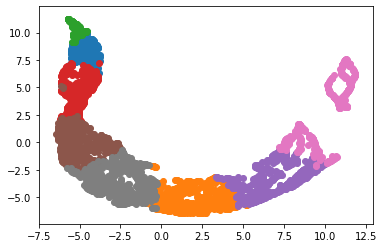

In [7]:
# Show assignment
for k in range(model.n_clusters):
    mask = clustership == k
    plt.scatter(projection[mask, 0], projection[mask, 1])

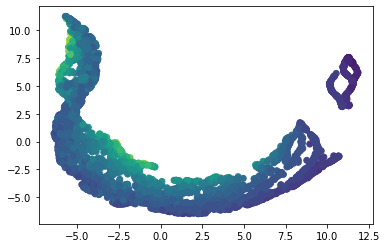

In [8]:
# Show age
plt.scatter(projection[:, 0], projection[:, 1], c=abalone_df['Rings'])